# Jupyter Notebook to Analyize and Visualize Post-stimulus arousal csv data

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop


In [4]:
PostStim = pd.read_csv(chooser.selected).drop(columns=['Unnamed: 0'])
PostStim

,Experiment,Tap_num,Screen,Date,Plate_id,Gene,Allele,dataset,Time,n,Number,Instantaneous Speed,Interval Speed,Bias,Tap,Morphwidth,Midline,Area,Angular Speed,Aspect Ratio,Kink,Curve,Crab,Pathlength
0,1,1,PD_Screen,20221102,C1029bc,N2,N2,N2,607,93.117647,49.088235,0.099150,0.092138,0.412794,0.0,0.112953,1.085312,0.142172,8.076471,0.345294,60.179412,34.944118,0.012938,1.934029
1,1,2,PD_Screen,20221102,C1029bc,N2,N2,N2,617,97.600000,45.966667,0.158137,0.098093,0.755733,0.0,0.105577,1.072867,0.132349,8.466667,0.290867,51.460000,32.816667,0.014677,2.475867
2,1,3,PD_Screen,20221102,C1029bc,N2,N2,N2,627,96.857143,54.000000,0.153531,0.096846,0.778229,0.0,0.100820,1.073660,0.130260,6.928571,0.287343,48.637143,32.025714,0.015011,2.275629
3,1,4,PD_Screen,20221102,C1029bc,N2,N2,N2,637,96.062500,57.343750,0.164319,0.096266,0.808375,0.0,0.098944,1.091734,0.131354,7.350000,0.271906,45.325000,31.412500,0.015062,2.557187
4,1,5,PD_Screen,20221102,C1029bc,N2,N2,N2,647,98.742857,64.028571,0.176909,0.097006,0.854486,0.0,0.105646,1.086757,0.133109,5.608571,0.249714,41.800000,30.700000,0.013957,2.731886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43391,1403,27,PD_Screen,20221014,A1014ce,vps-35,ok1880,vps-35_ok1880,867,75.271429,59.585714,0.091366,0.067793,0.599714,0.0,0.086737,0.815720,0.087640,7.247143,0.286086,49.095714,26.222857,0.012324,8.215843
43392,1403,28,PD_Screen,20221014,A1014ce,vps-35,ok1880,vps-35_ok1880,877,77.298507,59.417910,0.094057,0.069957,0.589060,0.0,0.083803,0.820818,0.088101,7.840299,0.288134,48.823881,26.443284,0.011900,8.527687
43393,1403,29,PD_Screen,20221014,A1014ce,vps-35,ok1880,vps-35_ok1880,887,75.633803,58.000000,0.088076,0.068735,0.530859,0.0,0.084620,0.814507,0.087935,7.532394,0.313465,51.249296,27.339437,0.012406,9.222479
43394,1403,30,PD_Screen,20221014,A1014ce,vps-35,ok1880,vps-35_ok1880,897,73.397059,49.485294,0.084465,0.067035,0.529735,0.0,0.086165,0.805349,0.087032,7.747059,0.305500,49.180882,26.467647,0.011806,9.799838


In [5]:
PostStimN2=PostStim[PostStim['Gene']=='N2'].reset_index(drop=True)
PostStimN2

,Experiment,Tap_num,Screen,Date,Plate_id,Gene,Allele,dataset,Time,n,Number,Instantaneous Speed,Interval Speed,Bias,Tap,Morphwidth,Midline,Area,Angular Speed,Aspect Ratio,Kink,Curve,Crab,Pathlength
0,1,1,PD_Screen,20221102,C1029bc,N2,N2,N2,607,93.117647,49.088235,0.099150,0.092138,0.412794,0.0,0.112953,1.085312,0.142172,8.076471,0.345294,60.179412,34.944118,0.012938,1.934029
1,1,2,PD_Screen,20221102,C1029bc,N2,N2,N2,617,97.600000,45.966667,0.158137,0.098093,0.755733,0.0,0.105577,1.072867,0.132349,8.466667,0.290867,51.460000,32.816667,0.014677,2.475867
2,1,3,PD_Screen,20221102,C1029bc,N2,N2,N2,627,96.857143,54.000000,0.153531,0.096846,0.778229,0.0,0.100820,1.073660,0.130260,6.928571,0.287343,48.637143,32.025714,0.015011,2.275629
3,1,4,PD_Screen,20221102,C1029bc,N2,N2,N2,637,96.062500,57.343750,0.164319,0.096266,0.808375,0.0,0.098944,1.091734,0.131354,7.350000,0.271906,45.325000,31.412500,0.015062,2.557187
4,1,5,PD_Screen,20221102,C1029bc,N2,N2,N2,647,98.742857,64.028571,0.176909,0.097006,0.854486,0.0,0.105646,1.086757,0.133109,5.608571,0.249714,41.800000,30.700000,0.013957,2.731886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,371,27,PD_Screen,20240403,C0403ae,N2,N2,N2,867,108.361111,78.861111,0.176258,0.088875,0.912694,0.0,0.109767,1.113811,0.143731,5.611111,0.241222,39.516667,28.311111,0.013478,5.592917
11482,371,28,PD_Screen,20240403,C0403ae,N2,N2,N2,877,107.973684,79.447368,0.171592,0.083029,0.894158,0.0,0.109392,1.120289,0.145073,6.155263,0.254895,41.092105,29.197368,0.014403,6.259053
11483,371,29,PD_Screen,20240403,C0403ae,N2,N2,N2,887,112.722222,81.750000,0.169114,0.089367,0.846083,0.0,0.106972,1.107450,0.141736,5.613889,0.250250,37.827778,28.530556,0.013297,6.112333
11484,371,30,PD_Screen,20240403,C0403ae,N2,N2,N2,897,106.942857,75.457143,0.177951,0.089283,0.858314,0.0,0.108011,1.115789,0.143195,6.157143,0.246286,40.297143,29.040000,0.013883,6.068029


<Figure size 640x480 with 0 Axes>

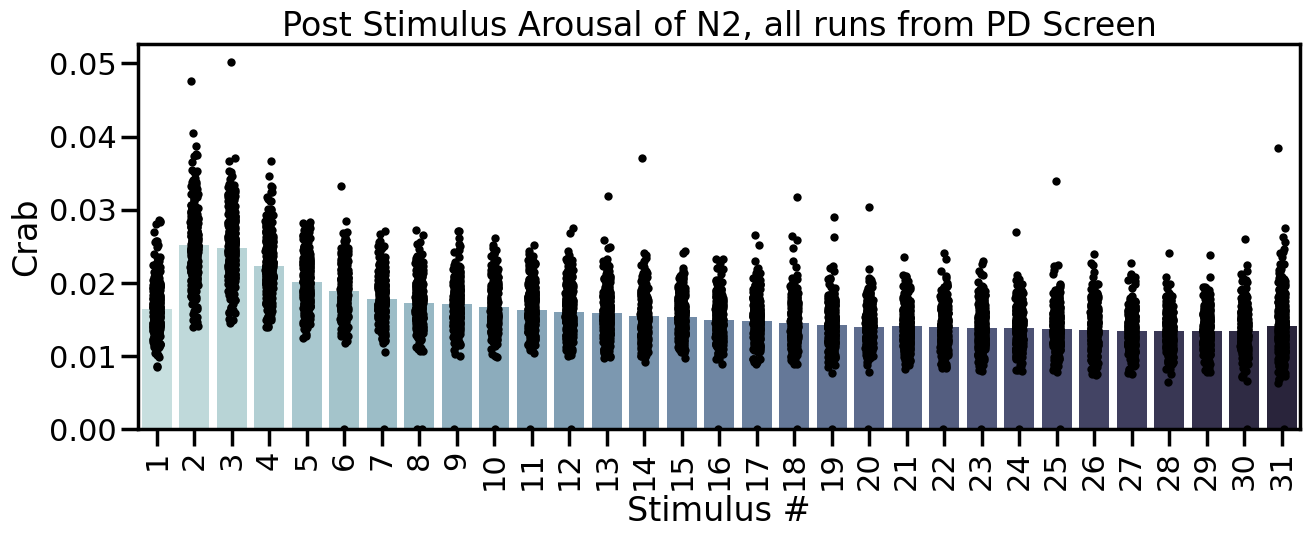

In [13]:
Title = "" #<---------------- Input Here -----------------
FileName = "PDScreen_PostStimArousal_N2"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Tap_num", 
                 y = 'Crab', 
                 data = PostStimN2, #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Tap_num',
                 estimator = 'mean',
                 errorbar = ("ci",95),
                 palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True),
                 # palette = [sns.color_palette()[1],'black'],
                 # palette = ['black',sns.color_palette()[0],sns.color_palette()[1]],
                 legend = False,
                 orient="v"
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
ax=sns.stripplot(x="Tap_num",
                 y="Crab",
                 data=PostStimN2,
                 size=6,
             color="k")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Stimulus #")
plt.xticks(rotation=90)
# plt.ylabel("Speed (mm/s)")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("Post Stimulus Arousal of N2, all runs from PD Screen")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [14]:
PostStimcat2=PostStim[PostStim['Gene']=='cat-2'].reset_index(drop=True)
PostStimcat2

,Experiment,Tap_num,Screen,Date,Plate_id,Gene,Allele,dataset,Time,n,Number,Instantaneous Speed,Interval Speed,Bias,Tap,Morphwidth,Midline,Area,Angular Speed,Aspect Ratio,Kink,Curve,Crab,Pathlength
0,490,1,PD_Screen,20220510,C0506ca,cat-2,e1112,cat-2_e1112,607,43.626866,26.208955,0.204197,0.118137,0.875552,0.0,0.140007,1.123981,0.164081,22.847761,0.492761,79.207463,43.077612,0.033572,13.737358
1,490,2,PD_Screen,20220510,C0506ca,cat-2,e1112,cat-2_e1112,617,47.904110,27.863014,0.270605,0.111296,0.868849,0.0,0.136122,1.131555,0.161701,25.684932,0.410274,64.043836,38.286301,0.038348,9.901137
2,490,3,PD_Screen,20220510,C0506ca,cat-2,e1112,cat-2_e1112,627,46.142857,29.914286,0.273607,0.097109,0.759329,0.0,0.130471,1.189690,0.161462,22.702857,0.404257,63.881429,39.450000,0.035307,8.456429
3,490,4,PD_Screen,20220510,C0506ca,cat-2,e1112,cat-2_e1112,637,44.042254,30.492958,0.261168,0.095735,0.882831,0.0,0.143106,1.171710,0.165851,22.540845,0.430761,68.836620,39.804225,0.035714,8.876507
4,490,5,PD_Screen,20220510,C0506ca,cat-2,e1112,cat-2_e1112,647,37.969231,29.923077,0.282995,0.092338,0.956062,0.0,0.132114,1.196769,0.161297,21.946154,0.385477,57.827692,39.133846,0.034235,9.584138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,504,27,PD_Screen,20220510,A0506dd,cat-2,tm2261,cat-2_tm2261,867,68.343284,51.119403,0.242258,0.086479,0.871433,0.0,0.113593,1.234439,0.156067,9.444776,0.287119,45.358209,35.468657,0.021406,9.438015
460,504,28,PD_Screen,20220510,A0506dd,cat-2,tm2261,cat-2_tm2261,877,68.142857,47.185714,0.248071,0.095343,0.871514,0.0,0.124667,1.261180,0.164236,10.944286,0.308729,51.598571,36.824286,0.024536,10.981371
461,504,29,PD_Screen,20220510,A0506dd,cat-2,tm2261,cat-2_tm2261,887,64.602941,47.294118,0.232926,0.091916,0.950000,0.0,0.124435,1.257859,0.160828,9.367647,0.300441,51.672059,36.525000,0.020990,10.919162
462,504,30,PD_Screen,20220510,A0506dd,cat-2,tm2261,cat-2_tm2261,897,63.567164,51.522388,0.233249,0.106375,0.920627,0.0,0.115072,1.263342,0.159271,9.485075,0.289687,48.992537,36.216418,0.020951,10.112328


<Figure size 640x480 with 0 Axes>

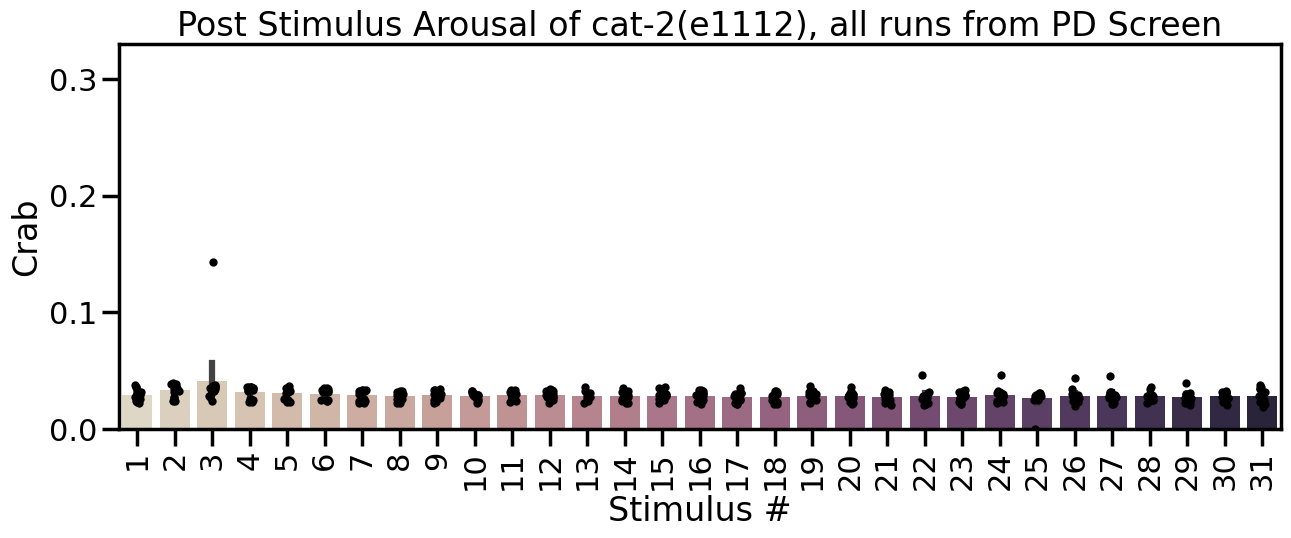

In [16]:
Title = "" #<---------------- Input Here -----------------
FileName = "PDScreen_PostStimArousal_cat2"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Tap_num", 
                 y = 'Crab', 
                 data = PostStimcat2, #<--------------- Input Here -------------
                 hue = 'Tap_num',
                 estimator = 'mean',
                 errorbar = ("ci",95),
                 palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
                 legend = False,
                 orient="v"
                )
ax=sns.stripplot(x="Tap_num",
                 y="Crab",
                 data=PostStimcat2,
                 size=6,
             color="k")
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("Stimulus #")
plt.xticks(rotation=90)
# plt.ylabel("Speed (mm/s)")
plt.ylim(top = 0.33)
# plt.ylim(bottom = -0.03)
plt.title("Post Stimulus Arousal of cat-2(e1112), all runs from PD Screen")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [70]:
PostStimFirstTap = PostStim[PostStim['Tap_num']==2].reset_index(drop=True)
PostStimFirstTap

,Experiment,Tap_num,Screen,Date,Plate_id,Gene,Allele,dataset,Time,n,Number,Instantaneous Speed,Interval Speed,Bias,Tap,Morphwidth,Midline,Area,Angular Speed,Aspect Ratio,Kink,Curve,Crab,Pathlength
0,1,2,PD_Screen,20221102,C1029bc,N2,N2,N2,617,97.600000,45.966667,0.158137,0.098093,0.755733,0.0,0.105577,1.072867,0.132349,8.466667,0.290867,51.460000,32.816667,0.014677,2.475867
1,2,2,PD_Screen,20220510,C0506ab,N2,N2,N2,617,44.471429,1.542857,0.219369,0.174267,-0.185714,0.0,0.160454,1.134539,0.160656,22.912857,0.451286,101.768571,43.618571,0.047609,0.079643
2,3,2,PD_Screen,20220510,A0506aa,N2,N2,N2,617,64.432836,37.910448,0.179876,0.106419,0.709537,0.0,0.111597,1.181267,0.152238,11.619403,0.337284,57.650746,36.014925,0.020719,9.482985
3,4,2,PD_Screen,20220510,B0506ac,N2,N2,N2,617,52.062500,36.000000,0.190079,0.100742,0.763396,0.0,0.118592,1.121383,0.149701,11.489583,0.335708,60.831250,35.195833,0.021683,8.426208
4,5,2,PD_Screen,20220510,C0506ae,N2,N2,N2,617,51.171875,31.875000,0.198491,0.095898,0.432406,0.0,0.129434,1.119147,0.151449,15.862500,0.363422,65.929688,35.265625,0.026475,5.712969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1399,2,PD_Screen,20221014,C0928ca,vps-35,ok1880,vps-35_ok1880,617,49.567568,40.000000,0.085724,0.061018,0.243527,0.0,0.107147,0.711411,0.090994,19.490541,0.497027,81.786486,32.677027,0.017012,2.729959
1398,1400,2,PD_Screen,20221014,A1014cb,vps-35,ok1880,vps-35_ok1880,617,44.203125,29.515625,0.054698,0.042419,0.022875,0.0,0.101692,0.773581,0.090948,13.359375,0.490109,82.695312,35.035938,0.012959,4.631906
1399,1401,2,PD_Screen,20221014,B1014cc,vps-35,ok1880,vps-35_ok1880,617,80.972973,50.972973,0.060127,0.058278,0.528243,0.0,0.095619,0.693268,0.083129,11.024324,0.451324,68.870270,30.494595,0.010832,5.366405
1400,1402,2,PD_Screen,20221014,C1014cd,vps-35,ok1880,vps-35_ok1880,617,74.846154,50.307692,0.083567,0.072323,0.423615,0.0,0.118285,0.741344,0.100332,15.102564,0.465718,73.392308,30.502564,0.013272,3.821256


In [71]:
result = PostStimFirstTap.groupby(["Gene"])['Instantaneous Speed'].aggregate(np.mean).reset_index().sort_values('Instantaneous Speed')

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_58825/941633280.py:1: FutureWarning: The provided callable <function mean at 0x105925580> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = PostStimFirstTap.groupby(["Gene"])['Instantaneous Speed'].aggregate(np.mean).reset_index().sort_values('Instantaneous Speed')


<Figure size 640x480 with 0 Axes>

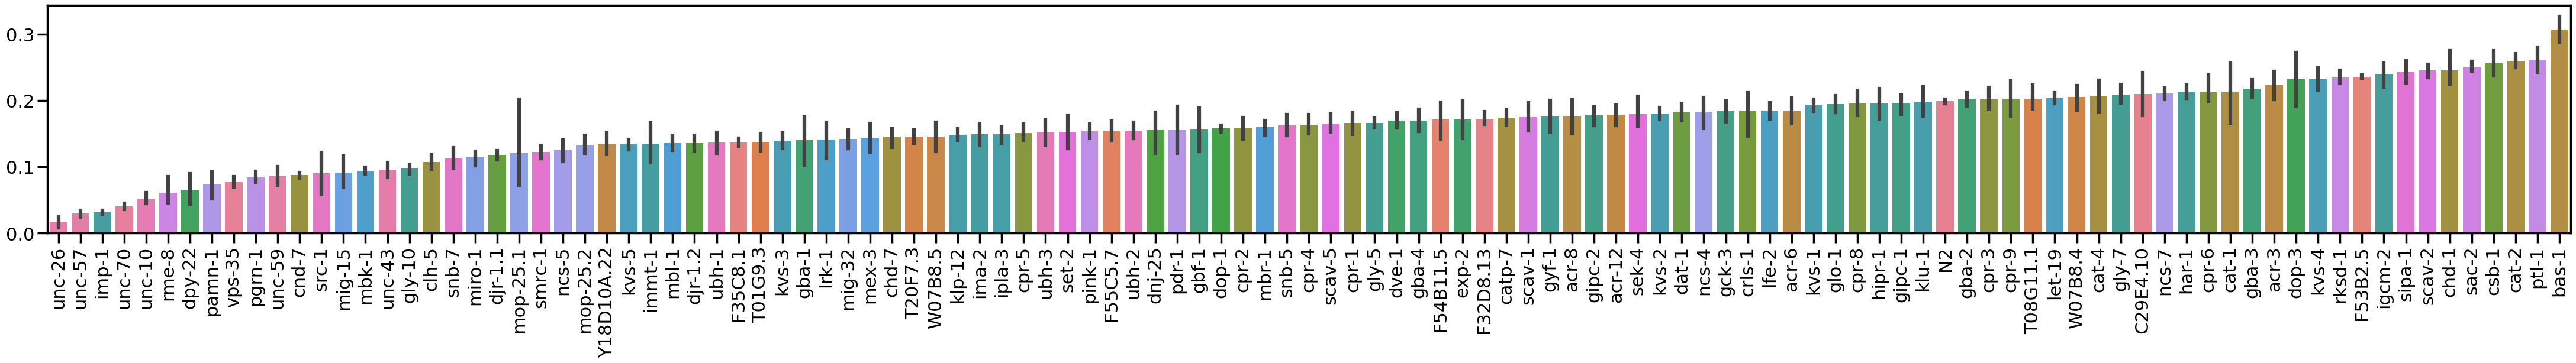

In [72]:
Title = "" #<---------------- Input Here -----------------
FileName = "PDScreen_PostStimArousal_SecondTap_ByGene"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(55, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
                 y = 'Instantaneous Speed', 
                 data = PostStimFirstTap, #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Gene',
                 order = result['Gene'],
                 estimator = 'mean',
                 errorbar = ("ci",95),
                 # palette = [sns.color_palette()[1],'black'],
                 # palette = ['black',sns.color_palette()[0],sns.color_palette()[1]],
                 legend = False,
                 orient="v"
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()